In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("..\\Data\\updated_dataset.csv")

In [4]:
df.head()

,Customer_ID,Gender,Age,City,Product_Category,Product_ID,Price,Quantity,Order_Time,Delivery_Time_mins,Payment_Method,Discount_Applied,Loyalty_Points_Earned,Cart_Abandonment_Flag,Total_Purchase_Value,Lifetime_Value,Competitor_Price,Ad_Click_Through_Rate,Browsing_Time_mins,Voice_Search_Count,Visual_Search_Count,Age_Group,Loyalty_Tier,Discount_Percentage,High_Spender_Flag
0,ZP_CUST4000,Female,51,Bangalore,Snacks,ZP_PROD6365,424.68,4,2023-01-29,11,Debit Card,20.87,198,1,1698.72,1698.72,407.778175,0.228576,84,11,7,41-60,Silver,4.914288,1
1,ZP_CUST4001,Non-Binary,37,Delhi,Groceries,ZP_PROD7167,492.82,2,2023-10-06,8,Debit Card,9.82,169,0,985.64,985.64,507.168695,0.677495,17,0,7,26-40,Silver,1.992614,1
2,ZP_CUST4002,Female,31,Chennai,Household Items,ZP_PROD7103,319.89,2,2023-03-01,14,Net Banking,25.13,64,1,639.78,639.78,360.362708,0.305420,182,3,0,26-40,Bronze,7.855825,0
3,ZP_CUST4003,Male,52,Mumbai,Snacks,ZP_PROD3534,183.63,1,2023-11-09,13,Net Banking,8.40,40,1,183.63,183.63,160.853115,0.577577,164,3,11,41-60,Bronze,4.574416,0
4,ZP_CUST4004,Male,38,Chennai,Household Items,ZP_PROD5514,408.78,4,2023-04-27,13,Debit Card,28.38,43,1,1635.12,1635.12,375.764482,0.295836,63,5,3,26-40,Bronze,6.942610,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            2000 non-null   object 
 1   Gender                 2000 non-null   object 
 2   Age                    2000 non-null   int64  
 3   City                   2000 non-null   object 
 4   Product_Category       2000 non-null   object 
 5   Product_ID             2000 non-null   object 
 6   Price                  2000 non-null   float64
 7   Quantity               2000 non-null   int64  
 8   Order_Time             2000 non-null   object 
 9   Delivery_Time_mins     2000 non-null   int64  
 10  Payment_Method         2000 non-null   object 
 11  Discount_Applied       2000 non-null   float64
 12  Loyalty_Points_Earned  2000 non-null   int64  
 13  Cart_Abandonment_Flag  2000 non-null   int64  
 14  Total_Purchase_Value   2000 non-null   float64
 15  Life

In [6]:
df.drop(['Customer_ID','Product_ID','Order_Time'],axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age,City,Product_Category,Price,Quantity,Delivery_Time_mins,Payment_Method,Discount_Applied,Loyalty_Points_Earned,Cart_Abandonment_Flag,Total_Purchase_Value,Lifetime_Value,Competitor_Price,Ad_Click_Through_Rate,Browsing_Time_mins,Voice_Search_Count,Visual_Search_Count,Age_Group,Loyalty_Tier,Discount_Percentage,High_Spender_Flag
0,Female,51,Bangalore,Snacks,424.68,4,11,Debit Card,20.87,198,1,1698.72,1698.72,407.778175,0.228576,84,11,7,41-60,Silver,4.914288,1
1,Non-Binary,37,Delhi,Groceries,492.82,2,8,Debit Card,9.82,169,0,985.64,985.64,507.168695,0.677495,17,0,7,26-40,Silver,1.992614,1
2,Female,31,Chennai,Household Items,319.89,2,14,Net Banking,25.13,64,1,639.78,639.78,360.362708,0.305420,182,3,0,26-40,Bronze,7.855825,0
3,Male,52,Mumbai,Snacks,183.63,1,13,Net Banking,8.40,40,1,183.63,183.63,160.853115,0.577577,164,3,11,41-60,Bronze,4.574416,0
4,Male,38,Chennai,Household Items,408.78,4,13,Debit Card,28.38,43,1,1635.12,1635.12,375.764482,0.295836,63,5,3,26-40,Bronze,6.942610,1


In [8]:
ohe = OneHotEncoder(drop='first')
encoded = ohe.fit_transform(df[["Gender","City","Product_Category","Payment_Method"]])

# Convert the encoded data to a DataFrame and get column names
encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(["Gender","City","Product_Category","Payment_Method"]))

# Concatenate the original DataFrame with the encoded columns
df_final = pd.concat([df, encoded_df], axis=1)

# Optionally, drop the original categorical columns if no longer needed
df_final = df_final.drop(columns=["Gender", "City", "Product_Category", "Payment_Method"])

In [9]:
age_group_categories = ['41-60', '26-40', '18-25', '61-70']
loyalty_tier_categories = ['Silver', 'Bronze']
ordinal_encoder = OrdinalEncoder(categories=[age_group_categories, loyalty_tier_categories])
encoded_label = ordinal_encoder.fit_transform(df_final[['Age_Group', 'Loyalty_Tier']])
encoded_df = pd.DataFrame(encoded_label, columns=['Age_Group_Encoded', 'Loyalty_Tier_Encoded'])
df_final = pd.concat([df_final, encoded_df], axis=1)
df_final = df_final.drop(columns=['Age_Group', 'Loyalty_Tier'])

In [10]:
correlation = df_final.corr()['Cart_Abandonment_Flag'].sort_values(ascending=False)

In [11]:
correlation.head(10)

Cart_Abandonment_Flag        1.000000
Delivery_Time_mins           0.865302
Payment_Method_Debit Card    0.041846
City_Chennai                 0.036960
Discount_Percentage          0.031938
Discount_Applied             0.027973
Quantity                     0.021312
Product_Category_Snacks      0.013296
Loyalty_Points_Earned        0.012963
City_Mumbai                  0.011979
Name: Cart_Abandonment_Flag, dtype: float64

In [12]:
correlation.tail(10)

Competitor_Price             -0.014667
Browsing_Time_mins           -0.017621
Payment_Method_Credit Card   -0.020852
Gender_Non-Binary            -0.022222
Price                        -0.023018
Product_Category_Groceries   -0.026613
City_Delhi                   -0.027458
Ad_Click_Through_Rate        -0.031470
Payment_Method_Net Banking   -0.032956
Age                          -0.060311
Name: Cart_Abandonment_Flag, dtype: float64

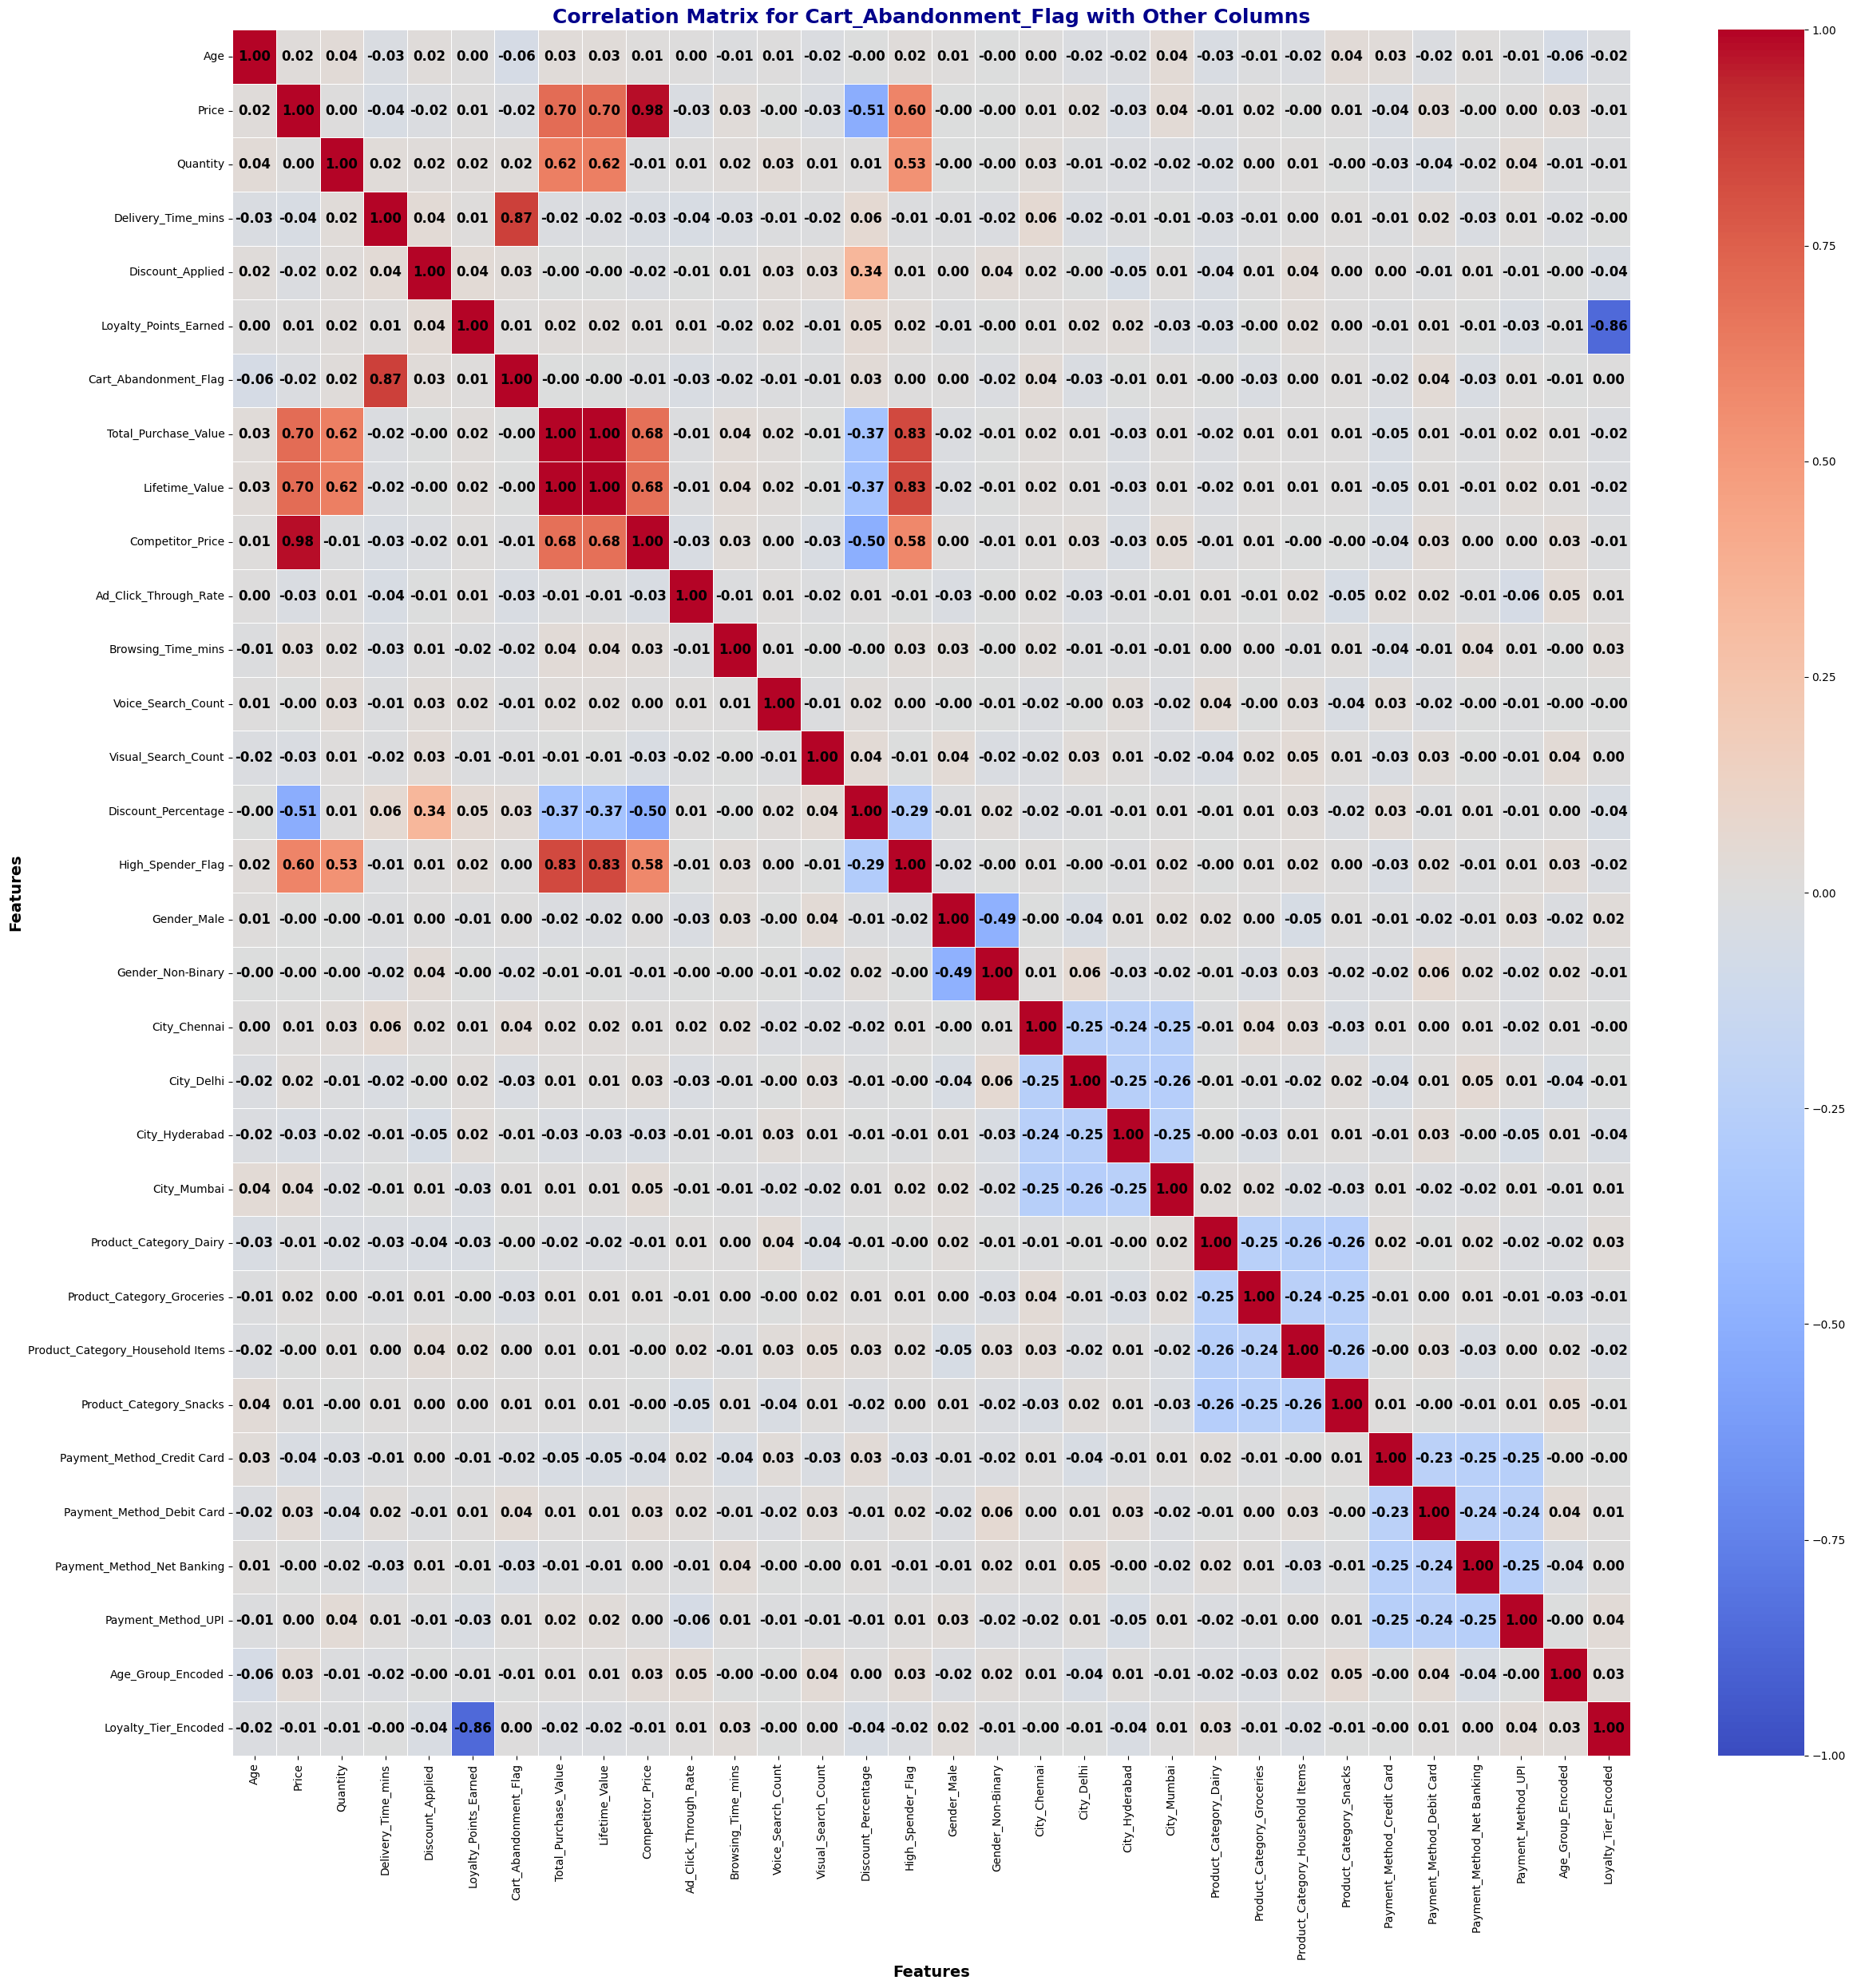

In [13]:
corr_matrix = df_final.corr()

# Create the plot with a stylish and modern theme
plt.figure(figsize=(25, 25))

# Plot the heatmap with customized colors and annotations
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, 
            annot_kws={"size": 12, "weight": "bold", "color": "black"}, linewidths=0.5, linecolor='white')

# Add title with a modern and bold style
plt.title('Correlation Matrix for Cart_Abandonment_Flag with Other Columns', fontsize=18, fontweight="bold", color="darkblue")

# Set x and y labels with bold fonts for readability
plt.xlabel('Features', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Features', fontsize=14, fontweight='bold', color='black')

# Adjust layout for clean presentation
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Select columns with correlation values >= 0.75 or <= -0.75
high_corr_columns = corr_matrix.columns[(corr_matrix['Cart_Abandonment_Flag'] >= 0.75) | (corr_matrix['Cart_Abandonment_Flag'] <= -0.75)]

# Display the selected columns
high_corr_columns

Index(['Delivery_Time_mins', 'Cart_Abandonment_Flag'], dtype='object')

In [15]:
df_final.to_csv("../Data/encoded_dataset.csv", index=False)

In [17]:
correlation.to_csv("../Data/correlation.csv", index=True)